# 🏘️ Predicting Lead Conversion in Real Estate Browsing Sessions

**GOAL:** Identify which online users are more likely to contact a real esetate agent based on session behavior and browsing city

## 1.0 Business Objective 🎯

The marketing team wants to better identify **potential leads** during user sessions on the real estate platform. This project aims to build a **predictive model** to determine which users are most likely to contact the listing agent, enabling more targeted follow-up or personalized experiences.

## 2.0 Exploratory Data Analysis (EDA)

### 2.1 Load Dataset

In [1]:
# upload dataset from computer

from google.colab import files
uploaded = files.upload()

Saving moval-zillow-data.csv to moval-zillow-data.csv


In [2]:
# load the uploaded CSV into a df since using colab we use io

import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['moval-zillow-data.csv']))

### 2.2 Inspect Dataframe

What does our dataset look like?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26468 entries, 0 to 26467
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       26468 non-null  object
 1   cookie_id     26468 non-null  object
 2   timestamp     26468 non-null  object
 3   city_browsed  26468 non-null  object
 4   listing_id    26468 non-null  object
 5   price_viewed  26468 non-null  int64 
 6   sqft_viewed   26468 non-null  int64 
 7   saved         26468 non-null  int64 
 8   shared        26468 non-null  int64 
 9   contacted     26468 non-null  int64 
 10  scheduled     26468 non-null  int64 
 11  session_id    26468 non-null  object
dtypes: int64(6), object(6)
memory usage: 2.4+ MB


Our dataset contains the following 12 features:


* **user_id**
    - assigned id for the user
* **cookie_id**
    - hashed UUID for the user's browser and or device
* **timestamp**
    - timestamp of the session
* **city_browsed**
    - the city the listing the user browsed
* **listing_id**
    - the listing id
* **price_viewed**
    - the listing's price
* **sqft_viewed**
    - the listing's square footage
* **saved**
    - binary variable, 1 if the user saved the listing; 0, otherwise
* **shared**
    - binary variable, 1 if the user shared the listing; 0, otherwise
* **contacted**
    - binary variable, 1 if the user contacted the listing agent; 0, otherwise
* **scheduled**
    - binary variable, 1 if the user scheduled a viewing; 0, otherwise
* **session_id**
    - assigned session id

In [4]:
df.describe()

,price_viewed,sqft_viewed,saved,shared,contacted,scheduled
count,26468.000000,26468.000000,26468.000000,26468.000000,26468.000000,26468.000000
mean,453856.463352,1816.377664,0.130611,0.062113,0.050741,0.041295
std,71188.885028,282.044708,0.336980,0.241365,0.219471,0.198976
min,300001.000000,1200.000000,0.000000,0.000000,0.000000,0.000000
25%,401953.000000,1613.000000,0.000000,0.000000,0.000000,0.000000
50%,451532.500000,1807.000000,0.000000,0.000000,0.000000,0.000000
75%,502824.250000,2007.000000,0.000000,0.000000,0.000000,0.000000
max,743705.000000,2890.000000,1.000000,1.000000,1.000000,1.000000


From here we can see that the average price of the viewed listing is \$453,000 with a standard deviation of \$71,000 and the average square footage of the lot of the viewed listings is about 1800 sq ft with a standard deviation of 280 sq ft. The highest priced house that was browsed was about \$740,000 and the lowest was about \$300,000. The highest square footage was 2,900, while the lowest was 1,200.

Check for missing or duplicated data

In [5]:
 df.isnull().sum()

,0
user_id,0
cookie_id,0
timestamp,0
city_browsed,0
listing_id,0
price_viewed,0
sqft_viewed,0
saved,0
shared,0
contacted,0


In [6]:
df.duplicated().sum()

np.int64(0)

There are no missing, null, or duplicate observations.

Inspect the first 5 rows

In [7]:
df.head()

,user_id,cookie_id,timestamp,city_browsed,listing_id,price_viewed,sqft_viewed,saved,shared,contacted,scheduled,session_id
0,user_225,0099c918-1be4-4ecb-9dd1-b02bd60fade9,2025-03-03 00:18:24.342602,Moreno Valley,MOR_listing_17,413201,1822,0,0,0,0,sess_c4476802
1,user_225,0099c918-1be4-4ecb-9dd1-b02bd60fade9,2025-03-03 00:20:24.342602,Moreno Valley,MOR_listing_66,310313,1570,0,0,0,0,sess_c4476802
2,user_225,0099c918-1be4-4ecb-9dd1-b02bd60fade9,2025-03-03 00:21:24.342602,Moreno Valley,MOR_listing_279,371065,1878,0,0,0,0,sess_c4476802
3,user_225,0099c918-1be4-4ecb-9dd1-b02bd60fade9,2025-03-03 00:22:24.342602,Moreno Valley,MOR_listing_113,399672,1276,0,1,0,0,sess_c4476802
4,user_225,0099c918-1be4-4ecb-9dd1-b02bd60fade9,2025-03-03 00:33:24.342602,Perris,PER_listing_217,569053,2143,0,0,0,0,sess_c4476802


Inspect 10 random samples

In [8]:
df.sample(10)

,user_id,cookie_id,timestamp,city_browsed,listing_id,price_viewed,sqft_viewed,saved,shared,contacted,scheduled,session_id
6049,user_85,3cd85390-1b57-4a95-b3f8-782f3e80513c,2025-07-20 08:01:24.342602,Moreno Valley,MOR_listing_272,320541,1603,0,0,0,0,sess_dec50972
5042,user_48,303d223f-1e3b-4af6-b205-7f054a329113,2025-06-14 19:27:24.342602,Moreno Valley,MOR_listing_231,455836,1424,0,0,0,0,sess_1b35b018
2441,user_224,19cf4640-c1fb-48d2-91a8-3214d19765cf,2025-03-28 05:19:24.342602,Perris,PER_listing_120,529570,1824,1,0,1,0,sess_72998d56
17397,user_40,a744dfc4-0940-4ee5-9c80-55bca556d54b,2025-07-03 21:53:24.342602,Menifee,MEN_listing_132,436916,1575,0,0,0,0,sess_cea429d2
5789,user_400,39f47175-8510-42b9-9abe-cae2288121b5,2025-07-04 04:58:24.342602,Perris,PER_listing_221,546024,1471,0,0,0,0,sess_67c6f72b
19975,user_497,bada5672-0d6c-4b17-b5a2-d46061be3c4a,2025-07-07 00:21:24.342602,Perris,PER_listing_6,351307,1227,1,0,0,0,sess_8e78e0ac
14116,user_238,88dde062-b6dc-445f-ae9f-073c7ee3b7f0,2025-05-19 03:32:24.342602,Moreno Valley,MOR_listing_78,466435,2001,0,0,0,0,sess_85fc00f6
15609,user_446,974b359c-0f39-4ca5-b906-bbcd8b676d98,2025-03-11 02:07:24.342602,Moreno Valley,MOR_listing_227,363603,2114,0,0,0,0,sess_fe5c08a8
24393,user_216,e7e50789-e3b4-422b-a5d1-9a560d71bdf9,2025-07-05 21:15:24.342602,Perris,PER_listing_60,459018,1451,0,0,0,0,sess_057429ba
12445,user_499,78842aac-864d-4ae7-aaac-3b37d9b113d9,2025-03-04 12:55:24.342602,Moreno Valley,MOR_listing_287,375416,1933,0,0,0,0,sess_a727af5b


### 2.3 Feature Engineering

#### Session Length

We'll create a new metric called ***session_length_sec*** to account for the duration between first and last interaction in a session

In [9]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

session_lengths = df.groupby('session_id')['timestamp'].agg(['min', 'max'])

session_lengths['session_length_sec'] = (session_lengths['max'] - session_lengths['min']).dt.total_seconds()

df = df.merge(session_lengths['session_length_sec'],
              left_on = 'session_id', right_index = True)

#### Distinct Listings Viewed

We'll create a new metric called ***num_listings_viewed*** to account for the number of distinct listings viewed in a session

In [10]:
listing_counts = df.groupby('session_id')['listing_id'].nunique().rename('num_listings_viewed')
df = df.merge(listing_counts, left_on = 'session_id', right_index = True)

#### User Engagement

Did the user engage? We're going to focus on saved and share listings here because we want to convert those users to contact an agent or schedule a viewing which moves them along the purhcasing pipeline (browse -> save -> share -> contact -> purchase)

**Saved Listings**
- signal a strong interest from a user. People typically save listings they’re seriously considering

**Shared Listings**
- often indicate listings worth showing to others (family, partner, agent), implying social validation or discussion


These are qualitative behavior signals that go beyond just "viewed" and reflect decision-making behaviors.

We'll create a new binary metric called ***user_engaged*** where we measure if they either shared or saved a listing.

In [11]:
# use or operator true when either is true

df['user_engaged'] = ((df['saved'] == 1) | (df['shared'] == 1)).astype(int)

#### Convert City to Categorical

Convert to categorical variable so it's easier to encode as dummy variables if need be when we model

In [12]:
df['city_encoded'] = df['city_browsed'].astype('category').cat.codes

Create a dictionary for the city and its code so we can reference it

In [13]:
# create a map for city to city encoded

city_map = dict(zip(df['city_browsed'], df['city_encoded']))

### 2.4 Correlation Matrix
 Correlation Matrix Heatmap for Numerical Features

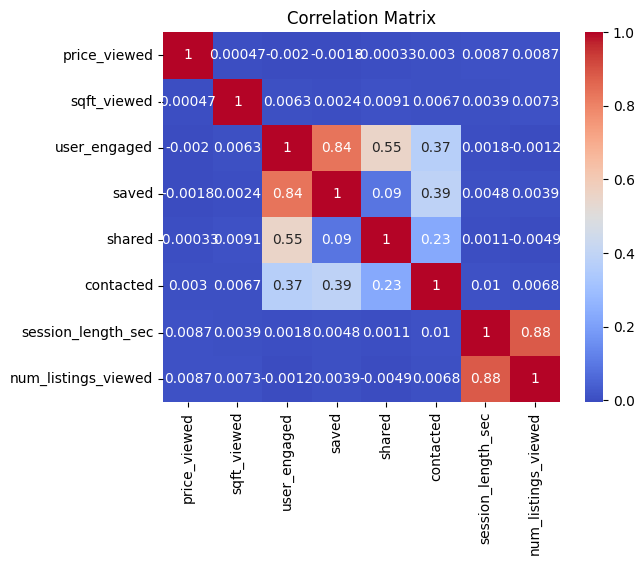

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['price_viewed', 'sqft_viewed', 'user_engaged',
            'saved', 'shared', 'contacted',
            'session_length_sec', 'num_listings_viewed']

sns.heatmap(df[num_cols].corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

### 2.5 Behavioral Analysis

Let's try to understand patterns in user behavior and how engagement (**saved and shared listings**) might influence contacting an agent. Ultimately, we want to see if we can convert them to contacting an agent and move them along the purchasing pipeline where they contact the listing agent and purchase the house.

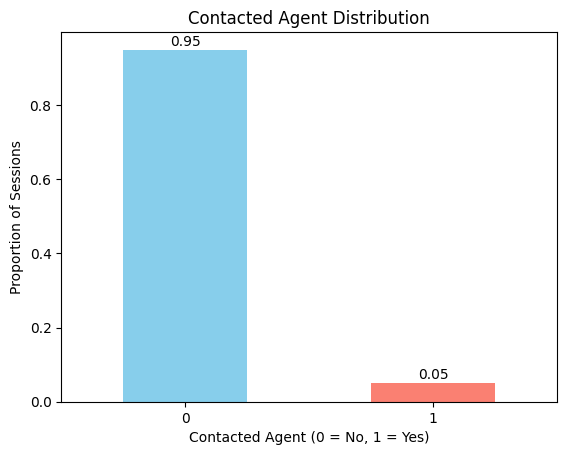

In [15]:
# get proportions with normalize

contacted_counts = df['contacted'].value_counts(normalize = True)

ax = contacted_counts.plot(
    kind = 'bar',
    title = 'Contacted Agent Distribution',
    color = ['skyblue', 'salmon']
)
plt.xlabel('Contacted Agent (0 = No, 1 = Yes)')
plt.ylabel('Proportion of Sessions')
plt.xticks(rotation = 0)

for i, v in enumerate(contacted_counts):
    ax.text(i, v + 0.01, f"{v:.2f}", ha = 'center')


plt.show()

We see that there is a class imbalance. 5% of all browsers have contacted the agent. This needs to be addressed when modeling, otherwise, a naive model might just predict "no contact" for everyone and still be 95% accurate but useless.

#### Understanding User Behavior through Numerical Features

In this step, we want to explore how user behavior differs between two groups:

- Users who contacted a real estate agent

- Users who did not contact an agent

To do this, we'll focus on the following numerical features:

- price_viewed: the price of the listing the user spent time viewing

- sqft_viewed: the square footage of the listing viewed

- num_listings_viewed: how many listings the user looked at during their session

- session_length_sec: how much time (in seconds) they spent browsing listings

These features give us insight into how engaged or serious the user might be. For example, users who contacted an agent might be spending more time, looking at more listings, or viewing higher-priced homes.

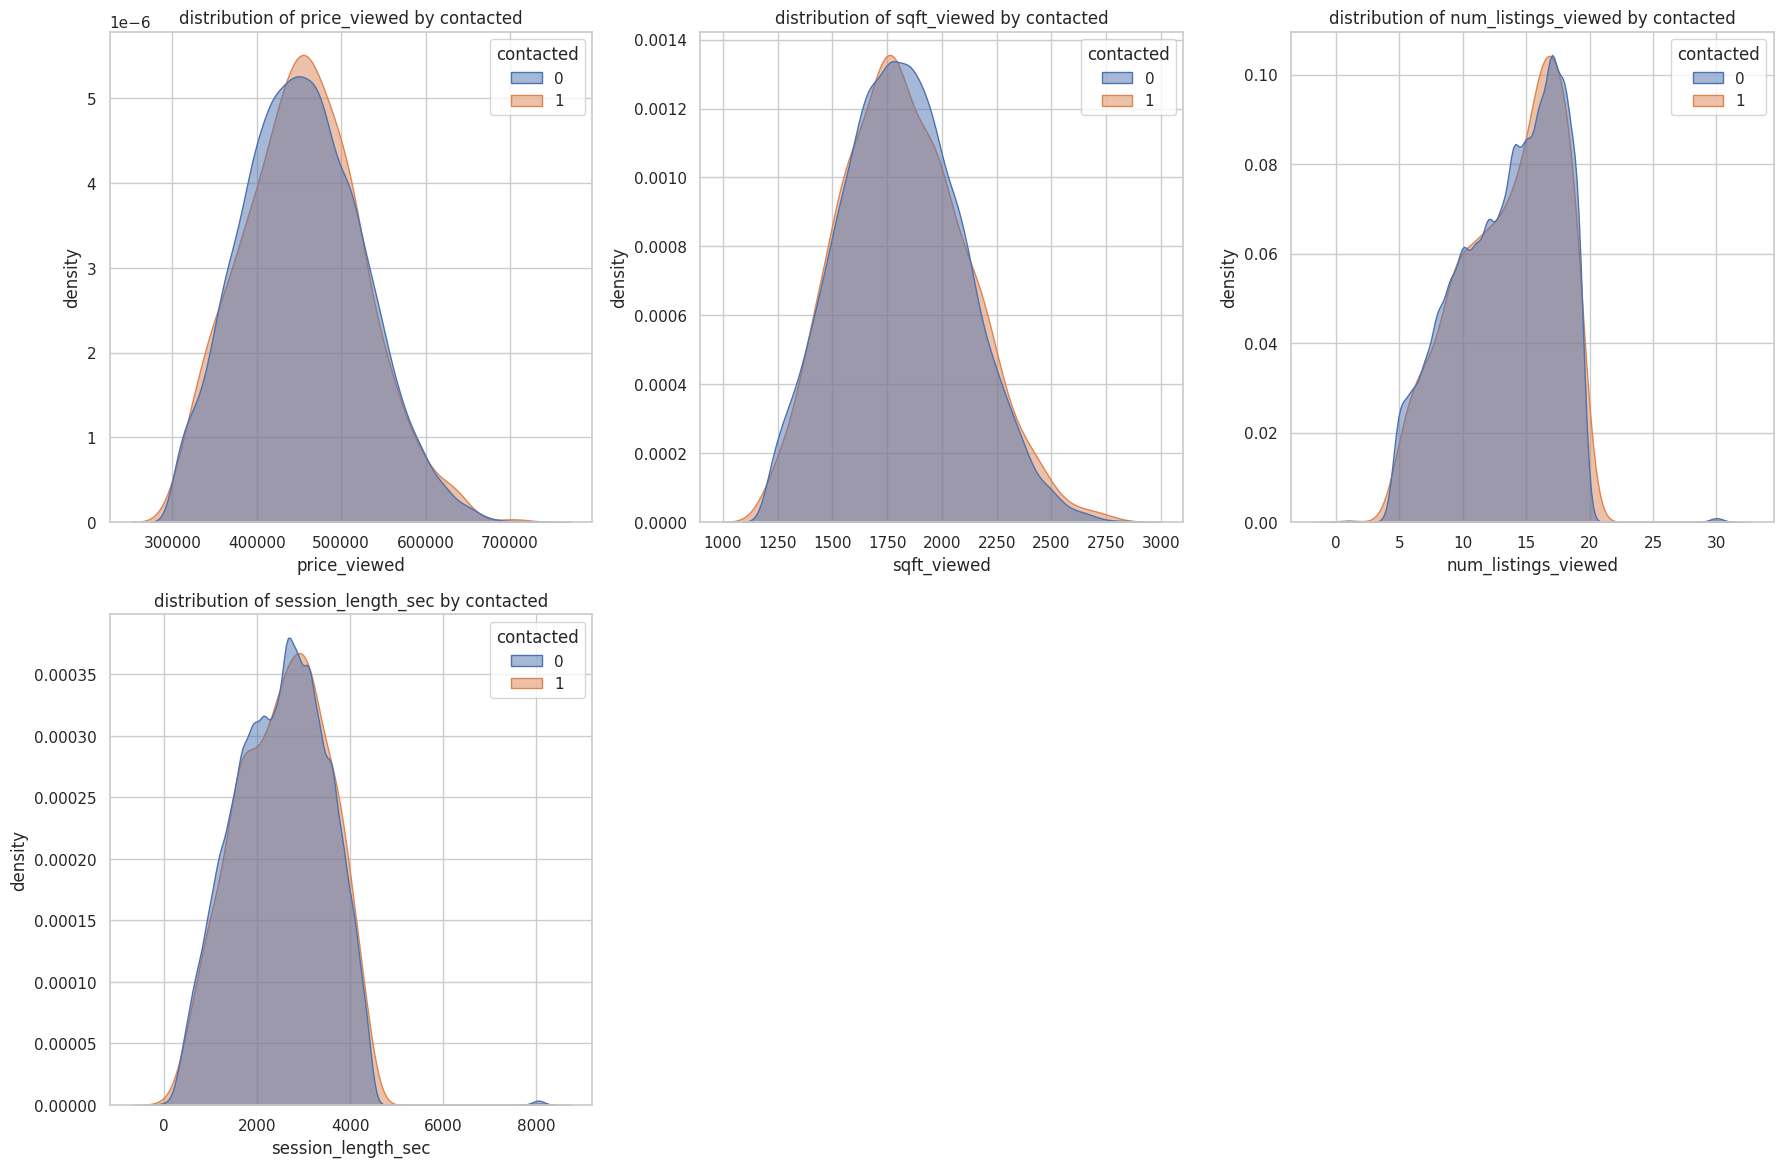

In [16]:
# set plot style
sns.set(style = "whitegrid")

# list of numeric columns to analyze
numeric_features = ['price_viewed', 'sqft_viewed', 'num_listings_viewed',
                    'session_length_sec']

# create subplots
plt.figure(figsize = (18, 12))

# loop through each numeric feature
for i, col in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)

    # plot kde distribution for each feature split by contacted_agent
    sns.kdeplot(data = df, x = col, hue = 'contacted',
                common_norm = False, fill = True, alpha = 0.5)

    plt.title(f'distribution of {col} by contacted')
    plt.xlabel(col)
    plt.ylabel('density')

plt.tight_layout()
plt.show()

#### User Engagement Rates Among Contacted vs Not Contacted

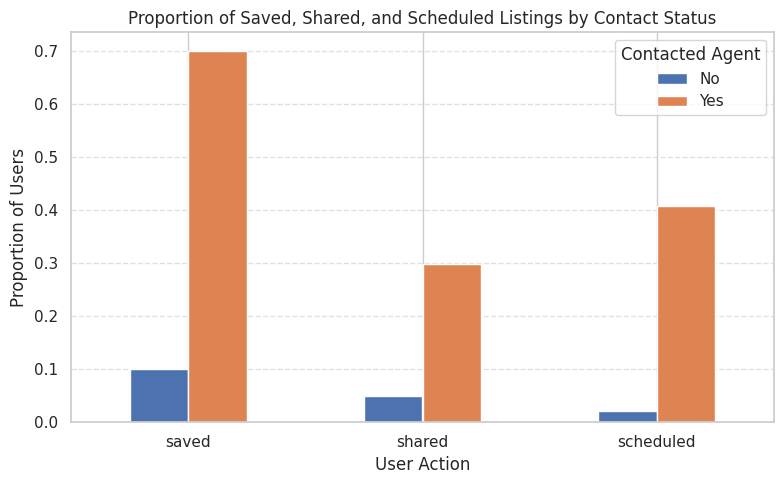

In [17]:
# find proportion of users who performed each action by contact status
engagement_props = df.groupby('contacted')[['saved', 'shared', 'scheduled']].mean()

# plot the proportions as a grouped bar chart
engagement_props.T.plot(kind = 'bar', figsize = (8, 5))

plt.title('Proportion of Saved, Shared, and Scheduled Listings by Contact Status')
plt.xlabel('User Action')
plt.ylabel('Proportion of Users')
plt.xticks(rotation = 0)
plt.legend(title = 'Contacted Agent', labels = ['No', 'Yes'])
plt.grid(axis = 'y', linestyle='--', alpha = 0.6)
plt.tight_layout()
plt.show()

In [18]:
print(df.groupby('contacted')[['saved', 'shared', 'scheduled']].sum())
print(df['contacted'].value_counts())

           saved  shared  scheduled
contacted                          
0           2516    1242        545
1            941     402        548
contacted
0    25125
1     1343
Name: count, dtype: int64


#### User Engagement Rates

In [19]:
engagement_cols = ['saved', 'shared', 'user_engaged']
for col in engagement_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts(normalize=True))



saved value counts:
saved
0    0.869389
1    0.130611
Name: proportion, dtype: float64

shared value counts:
shared
0    0.937887
1    0.062113
Name: proportion, dtype: float64

user_engaged value counts:
user_engaged
0    0.822729
1    0.177271
Name: proportion, dtype: float64


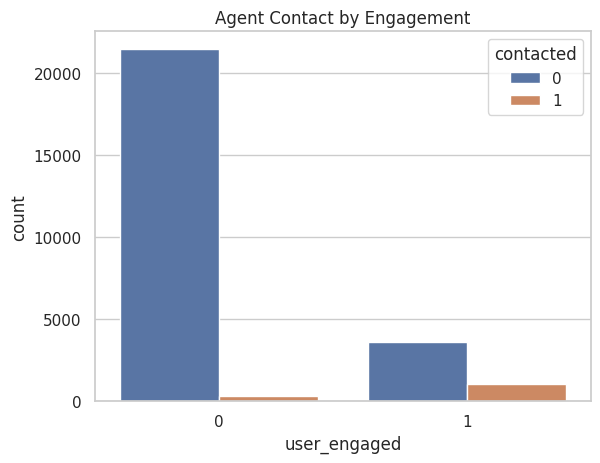

In [20]:
sns.countplot(data=df, x='user_engaged', hue='contacted')
plt.title('Agent Contact by Engagement')
plt.show()

#### Average Engagement by City

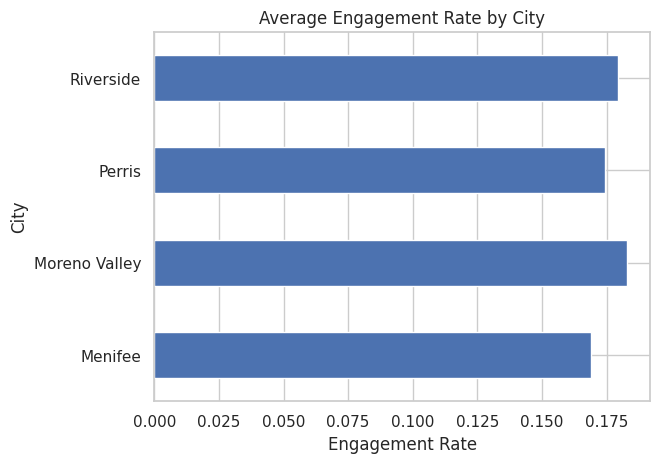

In [21]:
engagement_by_city = df.groupby('city_encoded')['user_engaged'].mean().sort_index(ascending = True)

ax = engagement_by_city.plot(kind = 'barh', title = 'Average Engagement Rate by City')
plt.xlabel('Engagement Rate')
plt.ylabel('City')
# set y-tick labels using the city_map
plt.yticks(ticks = engagement_by_city.index, labels = [list(city_map.keys())[list(city_map.values()).index(i)] for i in engagement_by_city.index])

plt.show()

In [22]:
city_map

{'Moreno Valley': 1, 'Perris': 2, 'Menifee': 0, 'Riverside': 3}

### 2.6 Time Analysis

##### Extract Useful Time Features from Timestamp

Here we want to extract the hour, day, and month from the timestamp.

In [23]:
# create columns for day of week, hour of day, and month

df['hour_of_day'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.day_name()
df['month'] = df['timestamp'].dt.month

#### Hourly Data

Here we want to understand how sessions are by the time of day

##### Count Sesssions by Hour of Day

/tmp/ipython-input-889242996.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hour_counts.index, y=hour_counts.values, palette="Greens_d")


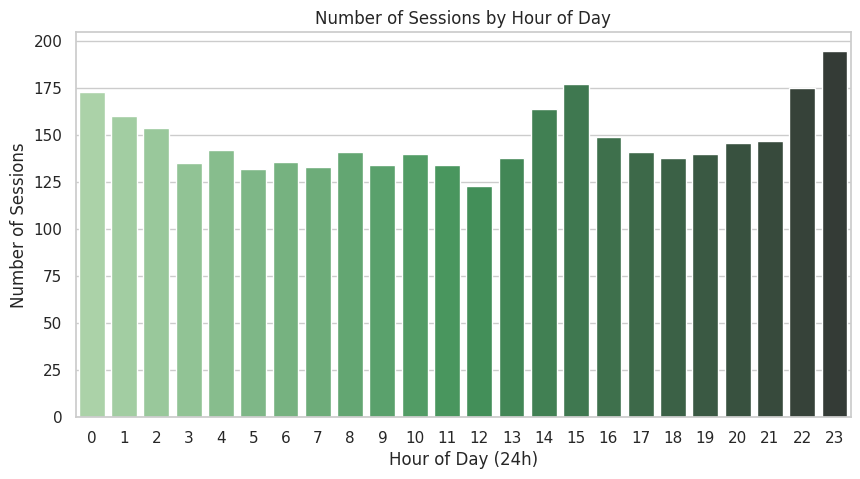

In [24]:
# count sessions by hour of day

hour_counts = df.groupby('hour_of_day')['session_id'].nunique()

plt.figure(figsize=(10, 5))
sns.barplot(x=hour_counts.index, y=hour_counts.values, palette="Greens_d")
plt.title("Number of Sessions by Hour of Day")
plt.xlabel("Hour of Day (24h)")
plt.ylabel("Number of Sessions")
plt.show()

##### Hourly Visit Distribution by Contacting Behavior

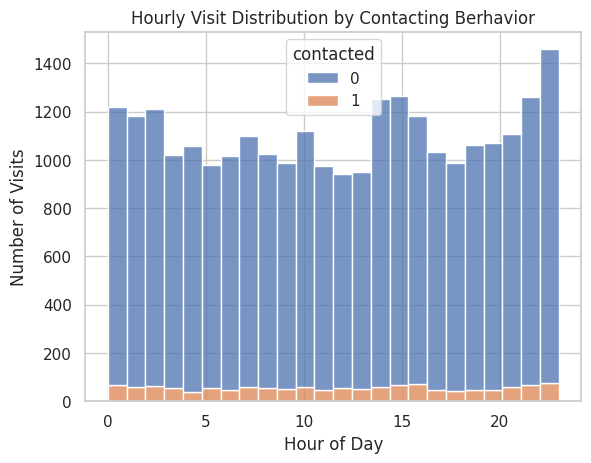

In [25]:
sns.histplot(data = df, x = 'hour_of_day', bins = 24,
             hue = 'contacted', multiple = 'stack')
plt.title('Hourly Visit Distribution by Contacting Berhavior')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Visits')
plt.show()

##### Proportion of Sessions Contacting Agent by Hour of Day

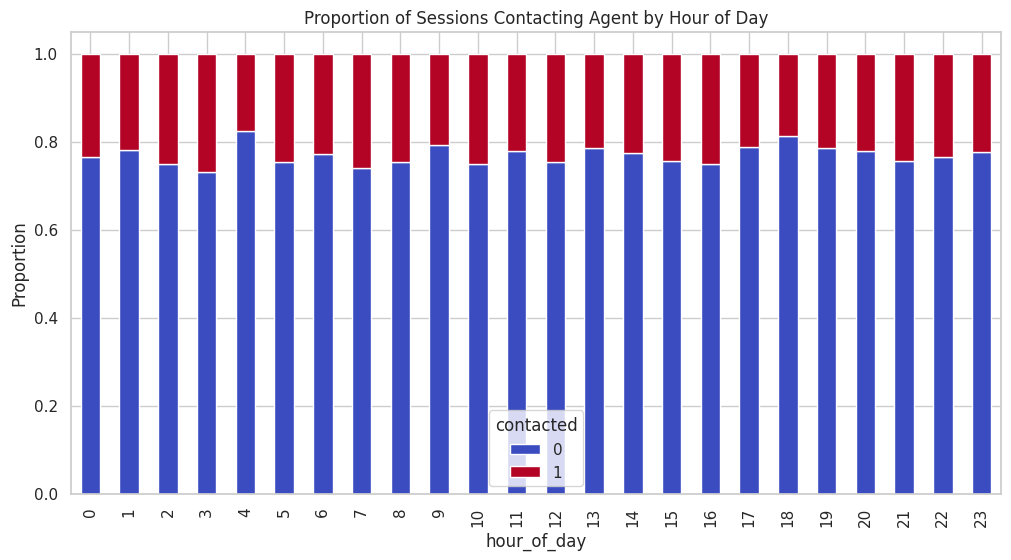

In [26]:
hour_contacted = df.groupby(['hour_of_day', 'contacted'])['session_id'].nunique().unstack().fillna(0)

hour_contacted_prop = hour_contacted.div(hour_contacted.sum(axis=1), axis=0)

hour_contacted_prop.plot(kind = 'bar', stacked = True, figsize = (12,6), colormap = 'coolwarm')
plt.title('Proportion of Sessions Contacting Agent by Hour of Day')
plt.ylabel('Proportion')
plt.show()

#### Daily Data

Here we want to understand sessions by the day of the week

##### Count Sessions by Day of Week

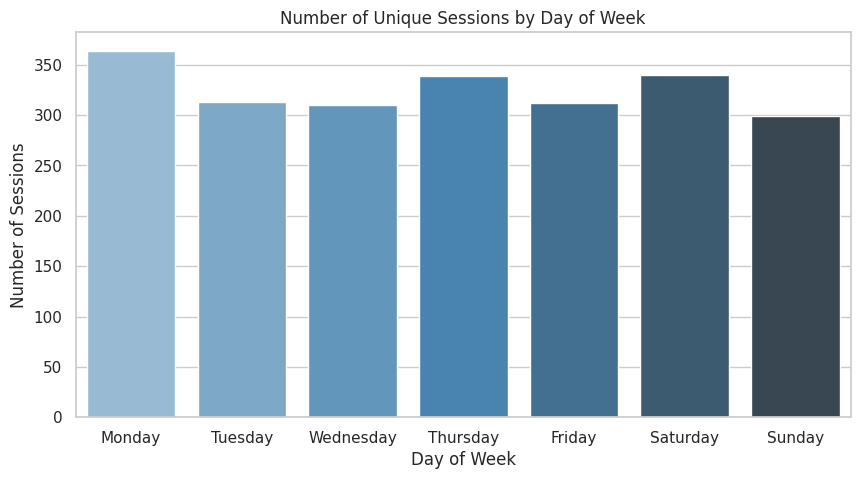

In [27]:
# count sessions by day of week

day_counts = df.groupby('day_of_week')['session_id'].nunique().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize = (10, 5))
sns.barplot(x = day_counts.index, hue = day_counts.index,
            y = day_counts.values, palette = "Blues_d")
plt.title("Number of Unique Sessions by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Sessions")
plt.show()

##### Distribution of Sessions by Day of Week and Whether User Contacted Agent

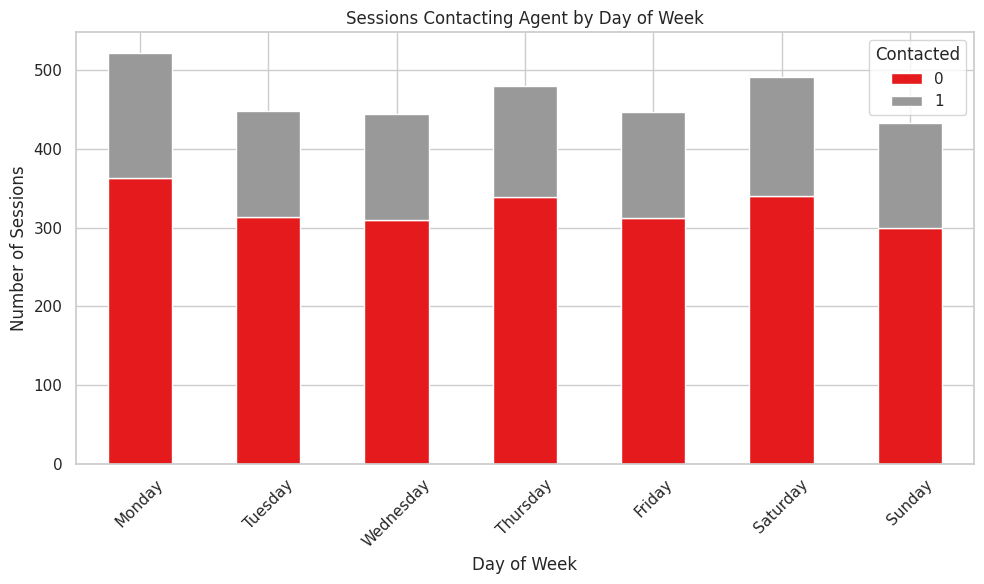

In [28]:
# group by day_of_week and contacted, count unique sessions
day_contacted = df.groupby(['day_of_week', 'contacted'])['session_id'].nunique().unstack().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# plot raw counts (no normalization)
day_contacted.plot(kind = 'bar', stacked = True,
                   figsize = (10,6), colormap = 'Set1')
plt.title('Sessions Contacting Agent by Day of Week')
plt.ylabel('Number of Sessions')
plt.xlabel('Day of Week')
plt.legend(title = 'Contacted')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

##### Proportion of Sessions Contacting Agent by Day of Week

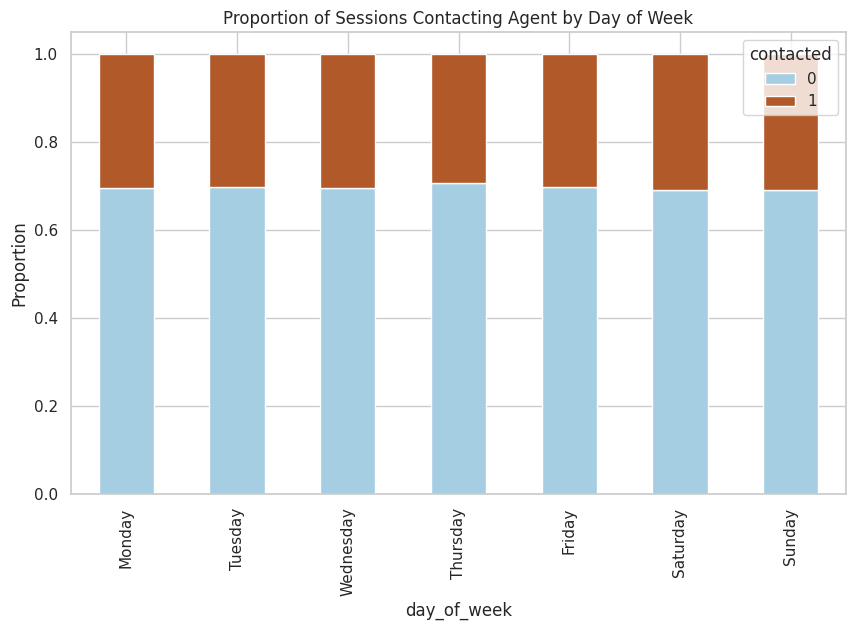

In [29]:
# group by day_of_week and contacted, count unique sessions

day_contacted = df.groupby(['day_of_week', 'contacted'])['session_id'].nunique().unstack().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# normalize to get proportions per day

day_contacted_prop = day_contacted.div(day_contacted.sum(axis = 1), axis = 0)

day_contacted_prop.plot(kind ='bar', stacked = True,
                        figsize = (10,6), colormap = 'Paired')
plt.title('Proportion of Sessions Contacting Agent by Day of Week')
plt.ylabel('Proportion')
plt.show()

#### Monthly Data

Here We want to understand sessions by the month

So, we'll need to create some metrics that will answer these questions:

- **how many sessions were there per month?**
- **how many contacted sessions were there per month?**
- **the contact rate per month?**

In [30]:
# number of sessions per month
monthly_sessions = df.groupby('month')['session_id'].nunique()

# number of contacted sessions per month
monthly_contacted = df[df['contacted'] == 1].groupby('month')['session_id'].nunique()

# contact rate
monthly_contact_rate = (monthly_contacted / monthly_sessions).fillna(0)


##### Monthly Sessions & Contacted Sessions

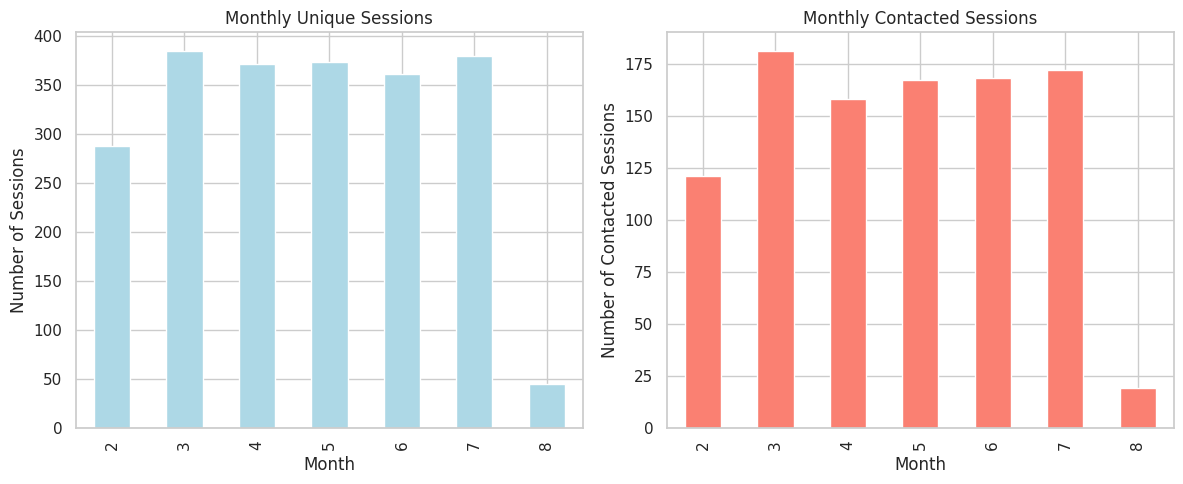

In [31]:
# plot sessions and contacted side by side
plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)
monthly_sessions.plot(kind = 'bar', color = 'lightblue')
plt.title("Monthly Unique Sessions")
plt.xlabel("Month")
plt.ylabel("Number of Sessions")

plt.subplot(1, 2, 2)
monthly_contacted.plot(kind = 'bar', color = 'salmon')
plt.title("Monthly Contacted Sessions")
plt.xlabel("Month")
plt.ylabel("Number of Contacted Sessions")

plt.tight_layout()
plt.show()

##### Monthly Contact Rate

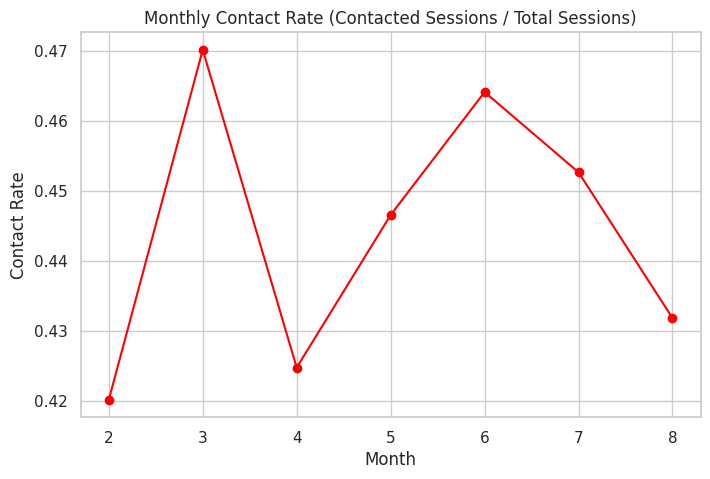

In [32]:
# contact rate over time

monthly_contact_rate.plot(marker = 'o', linestyle = '-',
                          figsize = (8,5), color = 'red')
plt.title("Monthly Contact Rate (Contacted Sessions / Total Sessions)")
plt.xlabel("Month")
plt.ylabel("Contact Rate")
plt.grid(True)
plt.show()

### 2.7 City Analysis

#### Monthly Contacted Sessions by City

In [33]:
# aggregate by month and city

# add month column if not done yet

df['month'] = df['timestamp'].dt.to_period('M').astype(str)

# aggregate contacted sessions by month and city

monthly_city_contacted = (
    df[df['contacted'] == 1]
    .groupby(['month', 'city_browsed'])['session_id']
    .nunique()
    .unstack(fill_value=0) )

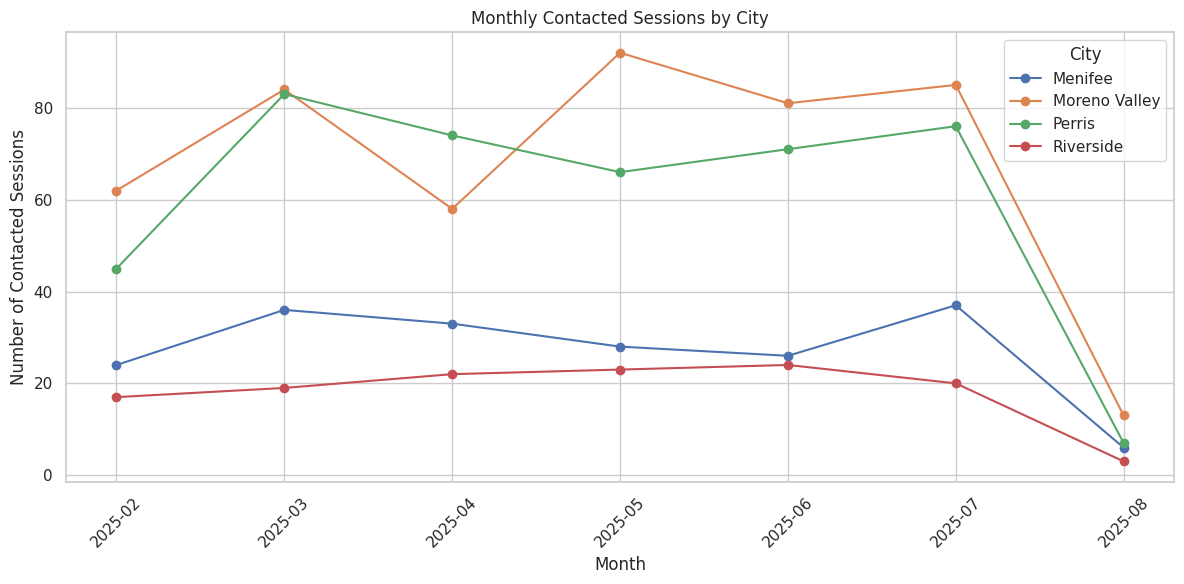

In [34]:
# monthly contacted trends by city

monthly_city_contacted.plot(figsize = (12, 6), marker = 'o')
plt.title("Monthly Contacted Sessions by City")
plt.xlabel("Month")
plt.ylabel("Number of Contacted Sessions")
plt.xticks(rotation = 45)
plt.grid(True)
plt.legend(title = 'City')
plt.tight_layout()
plt.show()

#### Normalize Total Sessions to Compare Contact Rates

We want to normalize the total contacted sessions count to compare contact rates between cities to account for different viewing rates per city since cities have different traffic levels.

In [35]:
# total sessions per month and city

monthly_city_sessions = (
    df.groupby(['month', 'city_browsed'])['session_id']
    .nunique()
    .unstack(fill_value = 0) )

# compute contact rate

monthly_city_contact_rate = (monthly_city_contacted / monthly_city_sessions).fillna(0)

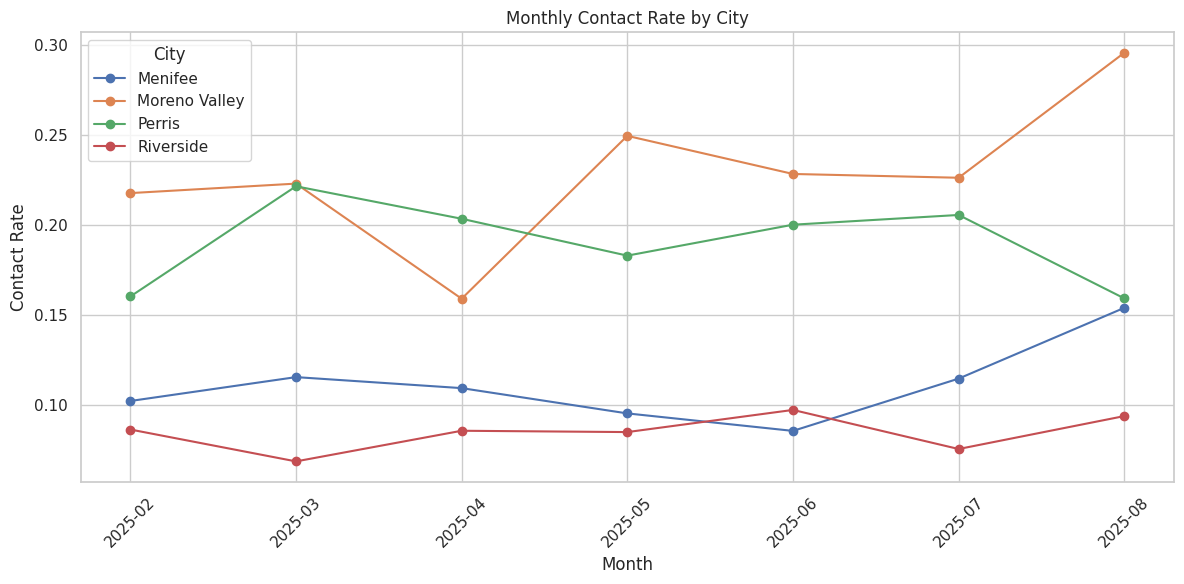

In [36]:
monthly_city_contact_rate.plot(figsize = (12, 6), marker = 'o')
plt.title("Monthly Contact Rate by City")
plt.xlabel("Month")
plt.ylabel("Contact Rate")
plt.xticks(rotation = 45)
plt.grid(True)
plt.legend(title = 'City')
plt.tight_layout()
plt.show()

#### Overall City Contact Rate

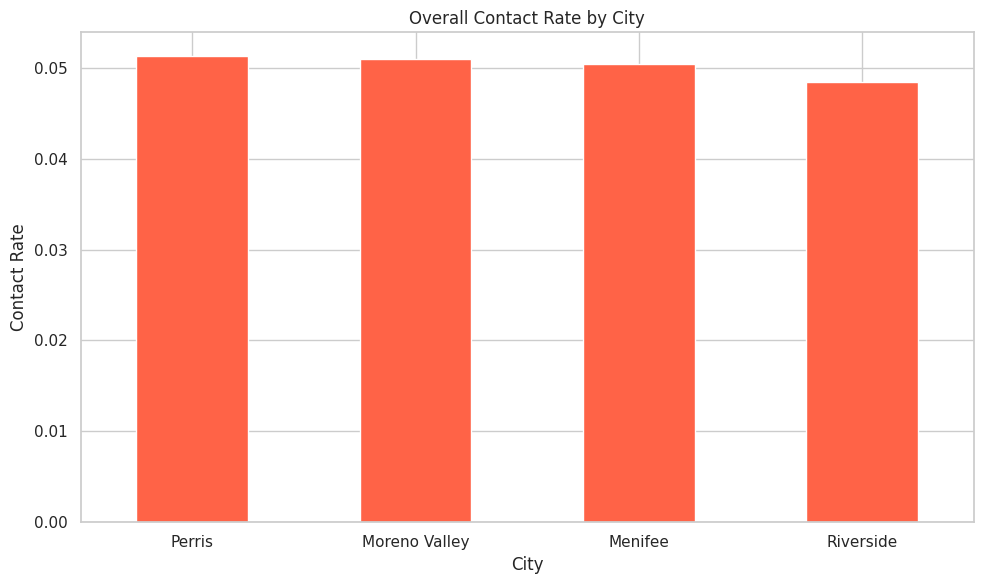

In [37]:
city_contact_rate = df.groupby('city_browsed')['contacted'].mean().sort_values(ascending = False)

city_contact_rate.plot(kind = 'bar', figsize = (10, 6), color = 'tomato')
plt.title('Overall Contact Rate by City')
plt.ylabel('Contact Rate')
plt.xlabel('City')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

### 2.8 User Segmentation

Group users into behavioral segments based on how they interact with the platform. This helps identify common patterns (e.g., “casual browsers” vs. “high-intent shoppers”)

#### K-Means Clustering

In [38]:
from sklearn.preprocessing import StandardScaler

# select clustering features
features = df[['session_length_sec', 'num_listings_viewed',
               'saved', 'shared', 'scheduled', 'hour_of_day']]

# scale them
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

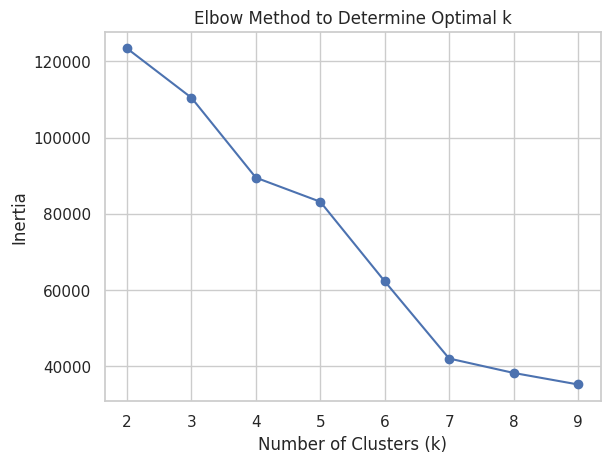

In [39]:
from sklearn.cluster import KMeans

inertia = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker = 'o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.grid(True)
plt.show()

Looks like 4 should be optimal k, or the number of clusters we should use for our kmeans parameter.

In [40]:
k_optimal = 4

kmeans = KMeans(n_clusters = k_optimal, random_state = 42)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [41]:
# cluster profiling

df.groupby('cluster')[['session_length_sec', 'num_listings_viewed',
                       'saved', 'shared', 'scheduled']].mean()

,session_length_sec,num_listings_viewed,saved,shared,scheduled
cluster,,,,,
0,1470.930204,9.023842,0.000124,0.055343,0.028042
1,3081.290577,15.898804,0.000920,0.046130,0.029045
2,3057.859193,15.961039,0.000000,0.059877,0.031306
3,2509.283850,13.512322,1.000000,0.118005,0.120615


In [42]:
# visualize clusters

import plotly.express as px

df['total_engagement'] = df[['saved', 'shared', 'scheduled']].sum(axis=1)

fig = px.scatter_3d(df,
                    x = 'session_length_sec',
                    y = 'num_listings_viewed',
                    z = 'total_engagement',
                    color = 'cluster',
                    opacity = 0.7,
                    title = '3D Clustering of User Sessions')
fig.show()

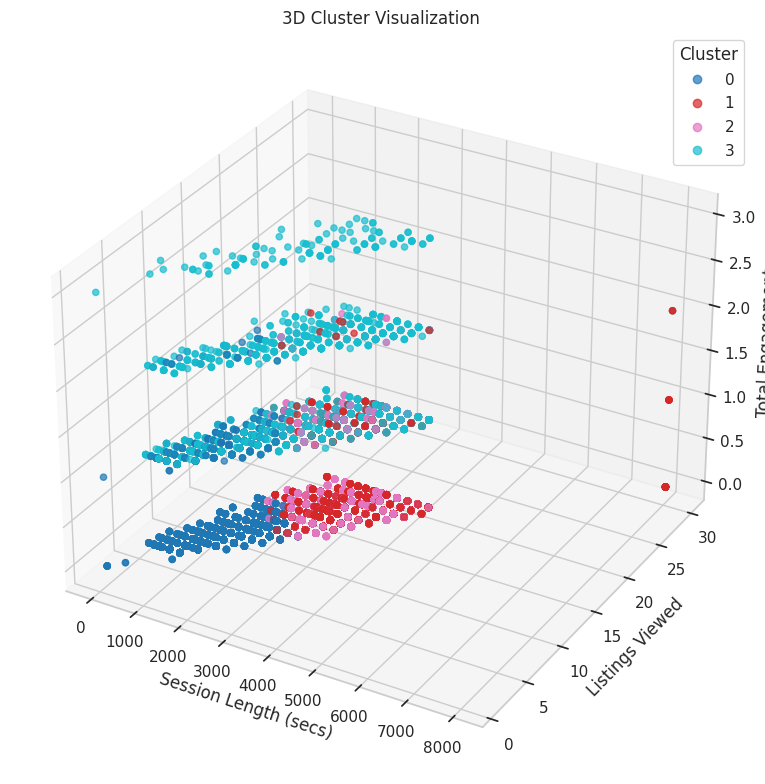

In [43]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df['session_length_sec'],
    df['num_listings_viewed'],
    df['saved'] + df['shared'] + df['scheduled'],  # composite engagement
    c=df['cluster'],
    cmap='tab10',
    alpha=0.7
)

ax.set_xlabel('Session Length (secs)')
ax.set_ylabel('Listings Viewed')
ax.set_zlabel('Total Engagement')
ax.set_title('3D Cluster Visualization')

plt.legend(*scatter.legend_elements(), title='Cluster')
plt.tight_layout()
plt.show()


The 3D clustering visualization shows four distinct layers corresponding to different levels of total engagement (sum of saved, shared, and scheduled actions). The distribution along session length (x-axis) and number of listings viewed (y-axis) is fairly similar across all engagement levels. However, the number of sessions decreases as total engagement increases, indicating that highly engaged sessions are less common. This suggests that while users spend similar amounts of time and browse a similar number of listings, engagement behavior varies independently. Therefore, session length and listings viewed alone may not be sufficient to predict engagement, highlighting the need for additional features or more sophisticated modeling.

## 3.0 Modeling

1. Prepare the Data
  - Select relevant numeric features and the target (apply city after)
  - Standardize features
  - Apply SMOTE to balance the target variable
  - the model will be evaluated on the test set reflecting real world imbalance
  - Split into train/test sets

2. Model Training & Evaluation
  - Use Logistic Regression, Random Forest, and Gradient Boosting
  - Apply 10-fold cross-validation
  - Report cross-validated metrics on the training set: Accuracy, Precision, Recall, F1, AUC
  - Report test set metrics to assess overfitting
  - Plot ROC curves on the test set (with red, blue, yellow)
  - Evaluate if the model is overfitting that is to say it's remembering patterns in the training data and not learning when evaluated on the test set

3. Model Metrics
  
  We will look at the AUC score, Accuracy, Recall, Precision, and F1Score.
    - AUC will tell us how well the model separates the two classes
    - Accuracy measures overall correctness and answers the question: Of all predictions the model made, how many were right?
    - Recall answers the question: Of all the users who actually contacted an agent, how many did the model correctly identify?
    - Precision answers the question: Of all the users the model predicted would contact an agent, how many actually did?
  
  When to use each:
    - Accuracy:
      - Classes are balanced and errors are equally costly
    - Precision:
      - Care more about minimizing false positives
    - Recall:
      - Care more about not missing real positives
    - F1 Score:
      - Want a balance between precision and recall

  We will not focus on accuracy because the model can achieve high accuracy on the test set just by predicting the majority class ("no contact"), even after training on SMOTE data.

  Since contacting an agent is rare but important (which is common), then we care most about identifying class 1 correctly — so we focus on precision/recall/F1 for class 1
  - Precision for class 1
    - How many predicted contacted users were actually contacted?
  - Recall for class 1
    - How many actual contacted users did we correctly identify?
  - F1-score for class 1 balances those two

### 3.1 Baseline Model Pre-Processing

In [44]:
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE

# select features and target
behavioral_sess_features = ['session_length_sec', 'num_listings_viewed',
                            'saved', 'shared', 'scheduled']
X = df[behavioral_sess_features]
y = df['contacted']

# split before scaling to avoid leakage
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42,
                                                    stratify = y)

# scale only on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# apply SMOTE to scaled training data only so it learns in a balanced way
smote = SMOTE(random_state = 42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train)


### 3.2 Train Models with 10-fold Cross Validation and Test on Training and Testing Data

We'll use a 10-fold cross validadtion with the training to see how well the model generalizes on average. But we will evaluate it on how well it actually performs on the test set.

#### Logistic Regression, Random Forest, Gradient Boosting

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, classification_report, roc_curve
import numpy as np

models = {
    'Logistic Regression': LogisticRegression(max_iter = 1000),
    'Random Forest': RandomForestClassifier(random_state = 42),
    'Gradient Boosting': GradientBoostingClassifier(random_state = 42) }

In [46]:
# train with 10-fold cross-validation, then evaluate on train and test
''' test_results = {
    'modelname': {
        'report': {...},
        'auc': ...,
        'fpr': ...,
        'tpr': ...
    },... }

    # classification_report (dict format) looks like this:
    '0': {'precision': ..., 'recall': ..., 'f1-score': ..., 'support': ...},
    '1': {'precision': ..., 'recall': ..., 'f1-score': ..., 'support': ...}
'''


k = 10
train_results = {}
test_results = {}

for name, model in models.items():
    # 10-fold cross-validation (on SMOTE-balanced training data)
    cv_scores = cross_val_score(model, X_train_sm, y_train_sm,
                                cv = k, scoring = 'roc_auc')
    print(f"{name} 10-Fold CV AUC: {np.mean(cv_scores):.3f}")

    # train model
    model.fit(X_train_sm, y_train_sm)

    # predict model on training set
    y_train_pred = model.predict(X_train_sm)
    y_train_proba = model.predict_proba(X_train_sm)[:, 1]
    # nested dictionary of classification report
    train_results[name] = {
        'report': classification_report(y_train_sm, y_train_pred,
                                        output_dict = True),
        'auc': roc_auc_score(y_train_sm, y_train_proba) }

    # predict on test set
    y_test_pred = model.predict(X_test_scaled)
    y_test_proba = model.predict_proba(X_test_scaled)[:, 1]
    test_results[name] = {
        'report': classification_report(y_test, y_test_pred, output_dict = True),
        'auc': roc_auc_score(y_test, y_test_proba),
        'fpr': roc_curve(y_test, y_test_proba)[0],
        'tpr': roc_curve(y_test, y_test_proba)[1] }

Logistic Regression 10-Fold CV AUC: 0.908
Random Forest 10-Fold CV AUC: 0.980
Gradient Boosting 10-Fold CV AUC: 0.953


In [47]:
# create a fct to extract the classificaiton report metrics from the train/test_results dictionary

def extract_metrics(report):
    return {
        'Accuracy': report['accuracy'],
        'Precision': report['1']['precision'],
        'Recall': report['1']['recall'],
        'F1 Score': report['1']['f1-score'] }

In [48]:
summary_rows = []

for name in models.keys():
    train_metrics = extract_metrics(train_results[name]['report'])
    test_metrics = extract_metrics(test_results[name]['report'])

    summary_rows.append({
        'Model': name,
        'Dataset': 'Train',
        # unpack train_metrics dictionary
        **train_metrics,
        'AUC': train_results[name]['auc']})
    summary_rows.append({
        'Model': name,
        'Dataset': 'Test',
        **test_metrics,
        'AUC': test_results[name]['auc']})

summary_df = pd.DataFrame(summary_rows)

print(summary_df.to_string(index = False))

              Model Dataset  Accuracy  Precision   Recall  F1 Score      AUC
Logistic Regression   Train  0.865274   0.845343 0.894129  0.869052 0.908320
Logistic Regression    Test  0.839252   0.222857 0.869888  0.354814 0.889317
      Random Forest   Train  0.946368   0.939158 0.954577  0.946805 0.987257
      Random Forest    Test  0.921043   0.339093 0.583643  0.428962 0.837141
  Gradient Boosting   Train  0.881866   0.874469 0.891741  0.883021 0.954958
  Gradient Boosting    Test  0.868342   0.252887 0.814126  0.385903 0.889471


#### Test Set ROC-AUC Scores

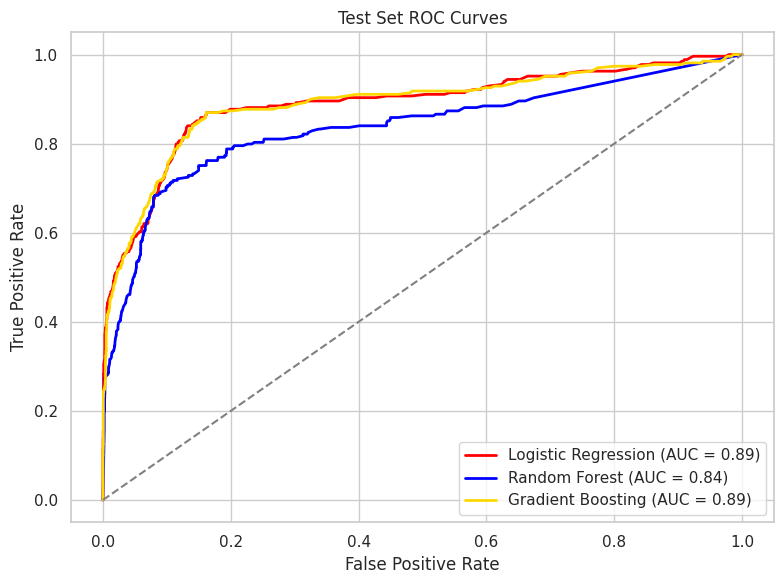

In [49]:
# ROC Curve
colors = {
    'Logistic Regression': 'red',
    'Random Forest': 'blue',
    'Gradient Boosting': 'gold'
}

plt.figure(figsize = (8, 6))

for name, result in test_results.items():
    plt.plot(result['fpr'], result['tpr'], label = f'{name} (AUC = {result["auc"]:.2f})',
             color = colors[name], linewidth = 2)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Set ROC Curves')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Incorporate City to Feature Set

Since it's categorical, we'll one-hot encode it

In [50]:
# one-hot encode city_browsed

df = pd.get_dummies(df, columns = ['city_browsed'], drop_first = True)

In [51]:
df.columns

Index(['user_id', 'cookie_id', 'timestamp', 'listing_id', 'price_viewed',
       'sqft_viewed', 'saved', 'shared', 'contacted', 'scheduled',
       'session_id', 'session_length_sec', 'num_listings_viewed',
       'user_engaged', 'city_encoded', 'hour_of_day', 'day_of_week', 'month',
       'cluster', 'total_engagement', 'city_browsed_Moreno Valley',
       'city_browsed_Perris', 'city_browsed_Riverside'],
      dtype='object')

New dummy columns were made for Moreno Valley, Perris, Riverside. Menifee was dropped and made as the baseline so city effects will be relative to Menifee.

In [52]:
# add to feature list

behavioral_sess_features = ['session_length_sec', 'num_listings_viewed', 'saved', 'shared', 'scheduled']

city_features = [col for col in df.columns if col.startswith('city_browsed_')]

features = behavioral_sess_features + city_features

#### Prepare Models with New Features

In [53]:
# select features and target
X = df[features]
y = df['contacted']

# split before scaling to avoid leakage
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42,
                                                    stratify = y)

# scale only on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# apply SMOTE to scaled training data only
smote = SMOTE(random_state = 42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train)

#### Train and Test Models on New Features

In [54]:
train_results_new = {}
test_results_new = {}

for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_sm, y_train_sm,
                                cv = k, scoring = 'roc_auc')
    print(f"{name} 10-Fold CV AUC: {np.mean(cv_scores):.3f}")

    model.fit(X_train_sm, y_train_sm)

    # test on train set
    y_train_pred = model.predict(X_train_sm)
    y_train_proba = model.predict_proba(X_train_sm)[:, 1]
    train_results_new[name] = {
        'report': classification_report(y_train_sm, y_train_pred,
                                        output_dict = True),
        'auc': roc_auc_score(y_train_sm, y_train_proba) }
    # test on test set
    y_test_pred = model.predict(X_test_scaled)
    y_test_proba = model.predict_proba(X_test_scaled)[:, 1]
    test_results_new[name] = {
        'report': classification_report(y_test, y_test_pred, output_dict = True),
        'auc': roc_auc_score(y_test, y_test_proba),
        'fpr': roc_curve(y_test, y_test_proba)[0],
        'tpr': roc_curve(y_test, y_test_proba)[1] }

summary_rows_new = []

for name in models.keys():
    train_metrics = extract_metrics(train_results_new[name]['report'])
    test_metrics = extract_metrics(test_results_new[name]['report'])

    summary_rows_new.append({
        'Model': name,
        'Dataset': 'Train',
        **train_metrics,
        'AUC': train_results[name]['auc']})
    summary_rows_new.append({
        'Model': name,
        'Dataset': 'Test',
        **test_metrics,
        'AUC': test_results[name]['auc']})

summary_df_new = pd.DataFrame(summary_rows_new)

print()
print(summary_df_new.to_string(index = False))

Logistic Regression 10-Fold CV AUC: 0.912
Random Forest 10-Fold CV AUC: 0.988
Gradient Boosting 10-Fold CV AUC: 0.965

              Model Dataset  Accuracy  Precision   Recall  F1 Score      AUC
Logistic Regression   Train  0.866468   0.849265 0.891095  0.869677 0.908320
Logistic Regression    Test  0.844919   0.226733 0.851301  0.358092 0.889317
      Random Forest   Train  0.971667   0.970473 0.972935  0.971703 0.987257
      Random Forest    Test  0.934643   0.386431 0.486989  0.430921 0.837141
  Gradient Boosting   Train  0.887886   0.878894 0.899751  0.889200 0.954958
  Gradient Boosting    Test  0.872308   0.256870 0.799257  0.388788 0.889471


#### Test Set ROC-AUC Curve for Features with City

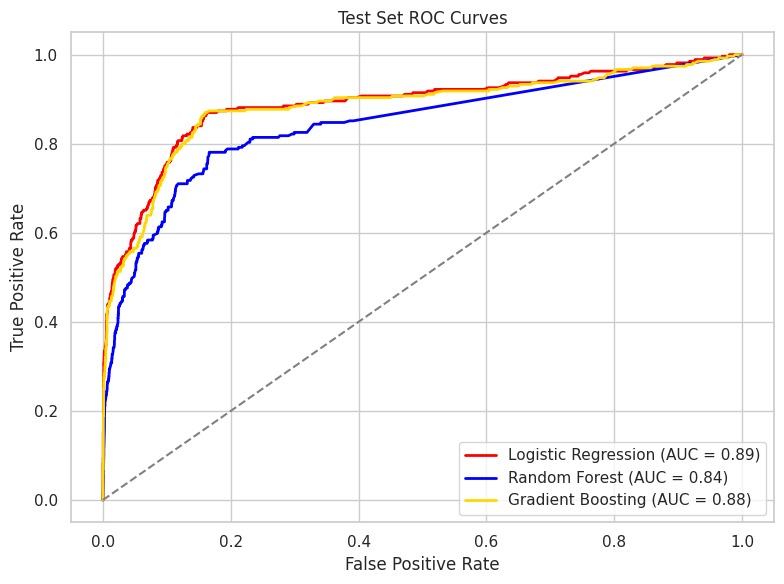

In [55]:
# ROC Curve for new features models
colors = {
    'Logistic Regression': 'red',
    'Random Forest': 'blue',
    'Gradient Boosting': 'gold'
}

plt.figure(figsize = (8, 6))

for name, result in test_results_new.items():
    plt.plot(result['fpr'], result['tpr'], label = f'{name} (AUC = {result["auc"]:.2f})',
             color = colors[name], linewidth = 2)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Set ROC Curves')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 3.3 Model Evaluation: City Level Features Add Value

Without City-Level Features:

- Mean Logistic Regression 10-Fold CV AUC: 0.908
- Mean Random Forest 10-Fold CV AUC: 0.980
- Mean Gradient Boosting 10-Fold CV AUC: 0.953

With City-Level Features:

- Mean Logistic Regression 10-Fold CV AUC: 0.912
- Mean Random Forest 10-Fold CV AUC: 0.988
- Mean Gradient Boosting 10-Fold CV AUC: 0.965

Since all models showed strong AUC during CV and training, we can infer:
- City dummies improved the model’s ability to distinguish between contacted vs. not contacted users.
- This implies that user behavior varies by city, and models benefit from knowing where a session took place.
- One-hot encoding dropped a baseline city — Menifee — so predictions are relative to that baseline.

However, Random Forest performed too well and shows signs of overfitting as there is a huge gap between Train AUC (0.987) and Test AUC (0.837) in the model with the city-level features. Whereas, Gradient Boosting and Logistic Regression generalize better with less of a drop in AUC from train to test, suggesting better stability.

All three models performed very well during cross-validation comparing their mean AUC scores, indicating that they can separate classes effectively with the SMOTE-balanced training data.

However, Random Forest performed too well and shows signs of overfitting as there is a huge gap between Train AUC (0.987) and Test AUC (0.837).
Whereas, Gradient Boosting and Logistic Regression generalize better with less of a drop in AUC from train to test, suggesting better stability.

### 3.4 Feature Importance

#### **SHAP for Logistic Regression Model**

SHAP values measure the impact of a feature on the model’s prediction for a specific instance or on average.

A higher SHAP value means that feature contributes more to pushing the prediction toward the positive class (in our case, contacting a listing agent).

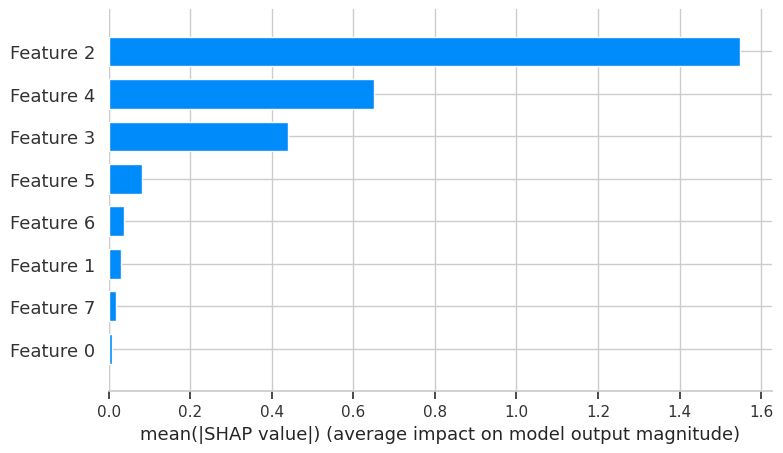

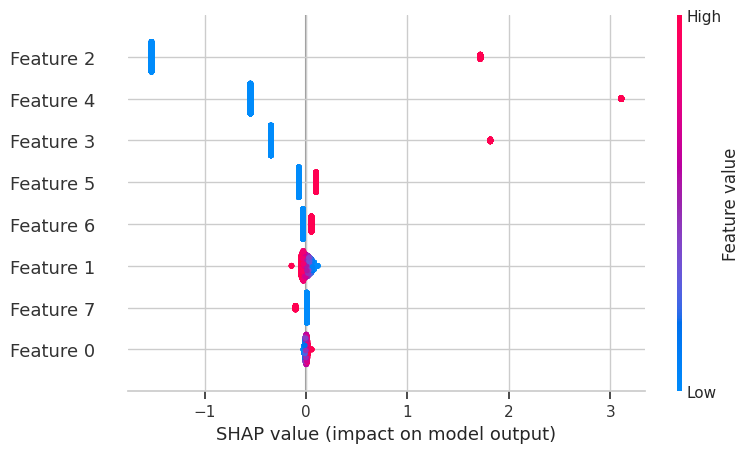

In [58]:
import shap

# create SHAP explainer (use TreeExplainer for tree-based models)
explainer = shap.Explainer(models['Logistic Regression'], X_train_sm)

# compute SHAP values for the test set
shap_values = explainer(X_test_scaled)

# summary plot (bar + beeswarm)
shap.summary_plot(shap_values, X_test_scaled, plot_type = 'bar')
shap.summary_plot(shap_values, X_test_scaled)

"saved" with ~1.5 SHAP means that whether a user saved a listing has a strong positive influence on the model’s prediction that they contacted an agent.

"shared" with ~0.6 SHAP means sharing a listing also increases the likelihood of contacting an agent, but with a smaller effect compared to saving.

In plain terms:

- Saving listings is a stronger signal/indicator that a user will contact an agent.

- Sharing listings also matters but is less influential than saving.

This matches intuition: users who save listings are more engaged and closer to conversion than users who just share.

#### **SHAP for Gradient Boosting Model**

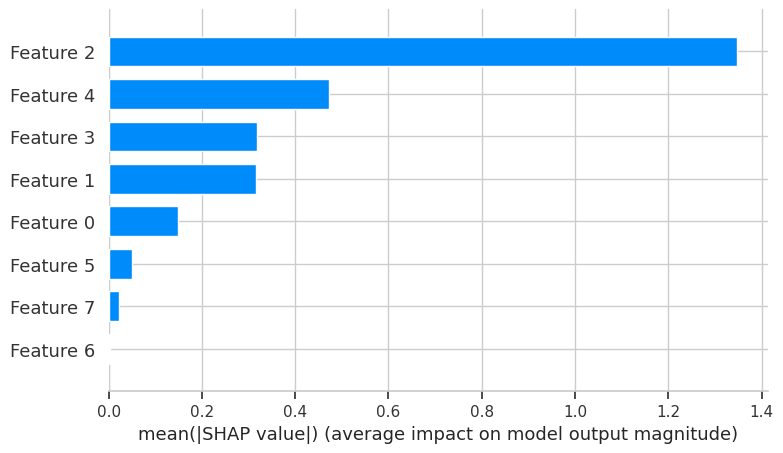

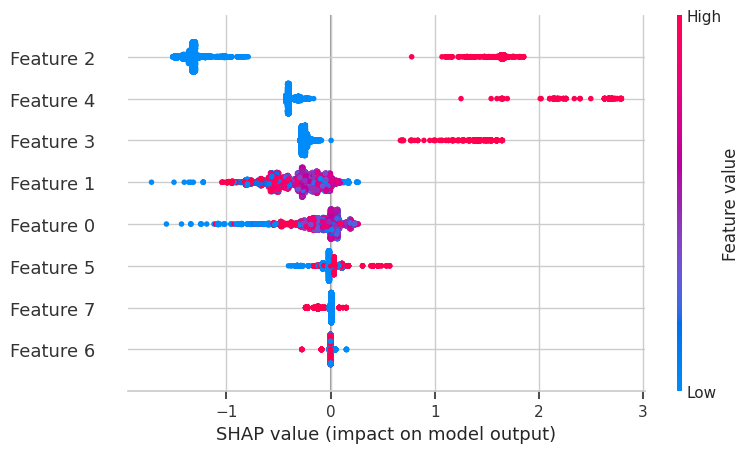

In [59]:
# create SHAP explainer (use TreeExplainer for tree-based models)
explainer = shap.Explainer(models['Gradient Boosting'], X_train_sm)

# compute SHAP values for the test set
shap_values = explainer(X_test_scaled)

# summary plot (bar + beeswarm)
shap.summary_plot(shap_values, X_test_scaled, plot_type = 'bar')
shap.summary_plot(shap_values, X_test_scaled)


In [60]:
print(f"Feature 2 is: {X.columns[2]}")
print(f"Feature 4 is: {X.columns[4]}")

Feature 2 is: saved
Feature 4 is: scheduled


"saved" with ~1.4 SHAP means that whether a user saved a listing has a strong positive influence on the model’s prediction that they contacted an agent.

"shared" with ~0.5 SHAP means sharing a listing also increases the likelihood of contacting an agent, but with a smaller effect compared to saving.

As with the SHAP values for the Logistic Regression model, the SHAP values for Gradient Boosting model are quite similar with showing feature 2 (saved engagements) as the greatest positive influence followed by feature 4 (scheduled engagements).

#### Logistic Regression Coefficient Evaluation and Model Simplification

Next, we'll assess the statistical significance of the logistic regression model’s coefficients by examining their p-values at a 5% significance level.

The hypotheses are defined as:

- **Null hypothesis**:
    
  $H_0: \beta = 0$
  
  — the coefficient has no effect  

- **Alternative hypothesis**:

  $H_1: \beta \ne 0$
  
  — the coefficient has a statistically significant effect

Coefficients with p-values less than 0.05 allow us to reject the null hypothesis, indicating that the variable contributes meaningfully to the model.

We'll iteratively remove the variable with the highest (least significant) p-value and refit the model, checking if the model's **log-likelihood** improves. Continuing this process until all remaining coefficients are statistically significant.

In [61]:
import statsmodels.api as sm

X_train_scaled_df = pd.DataFrame(X_train_sm, columns = X.columns)
X_const = sm.add_constant(X_train_scaled_df)
logit_model = sm.Logit(y_train_sm, X_const).fit()

print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.350492
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              contacted   No. Observations:                40200
Model:                          Logit   Df Residuals:                    40191
Method:                           MLE   Df Model:                            8
Date:                Wed, 06 Aug 2025   Pseudo R-squ.:                  0.4943
Time:                        20:37:13   Log-Likelihood:                -14090.
converged:                       True   LL-Null:                       -27865.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.3492      0.018    -74.175      0.000      

In [62]:
X_reduced = X_train_scaled_df.drop(columns = ['session_length_sec'])
X_const_reduced = sm.add_constant(X_reduced)
reduced_model = sm.Logit(y_train_sm, X_const_reduced).fit()

print(reduced_model.summary())

Optimization terminated successfully.
         Current function value: 0.350494
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              contacted   No. Observations:                40200
Model:                          Logit   Df Residuals:                    40192
Method:                           MLE   Df Model:                            7
Date:                Wed, 06 Aug 2025   Pseudo R-squ.:                  0.4943
Time:                        20:37:13   Log-Likelihood:                -14090.
converged:                       True   LL-Null:                       -27865.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.3492      0.018    -74.177      0.000      

In [63]:
X_reduced = X_train_scaled_df.drop(columns = ['session_length_sec', 'city_browsed_Perris'])
X_const_reduced = sm.add_constant(X_reduced)
reduced_model = sm.Logit(y_train_sm, X_const_reduced).fit()

print(reduced_model.summary())

Optimization terminated successfully.
         Current function value: 0.350529
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              contacted   No. Observations:                40200
Model:                          Logit   Df Residuals:                    40193
Method:                           MLE   Df Model:                            6
Date:                Wed, 06 Aug 2025   Pseudo R-squ.:                  0.4943
Time:                        20:37:14   Log-Likelihood:                -14091.
converged:                       True   LL-Null:                       -27865.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.3490      0.018    -74.169      0.000      

In [64]:
X_reduced = X_train_scaled_df.drop(columns = ['session_length_sec', 'city_browsed_Perris',
                                              'num_listings_viewed'])
X_const_reduced = sm.add_constant(X_reduced)
reduced_model = sm.Logit(y_train_sm, X_const_reduced).fit()

print(reduced_model.summary())

Optimization terminated successfully.
         Current function value: 0.350568
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              contacted   No. Observations:                40200
Model:                          Logit   Df Residuals:                    40194
Method:                           MLE   Df Model:                            5
Date:                Wed, 06 Aug 2025   Pseudo R-squ.:                  0.4942
Time:                        20:37:14   Log-Likelihood:                -14093.
converged:                       True   LL-Null:                       -27865.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.3488      0.018    -74.163      0.000      

I iteratively removed statistically insignificant variables from the logistic regression model. The log-likelihood changed only marginally (from −14090 to −14093), suggesting minimal impact on model fit. While the final model retains only statistically significant features and is easier to interpret, the negligible performance difference implies that we could have reasonably kept the original model unchanged which we will do.

## 4.0 Model Selection

### 4.1 Recommended Model: Logistic Regression

Because of the ease of interpretation for stakeholders, I recommend the logsitic regression model. From the logistics regression coefficients, we can interpret their log-odds as odds ratios.

In [65]:
logit_model = models['Logistic Regression']

feature_names = X.columns
coefficients = logit_model.coef_[0]

# create a df for easy viewing
logit_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# sort by absolute value of coefficients
logit_importance['Abs_Coefficient'] = np.abs(logit_importance['Coefficient'])
logit_importance = logit_importance.sort_values(by = 'Abs_Coefficient',
                                                ascending = False)

# drop the helper column
logit_importance.drop(columns = 'Abs_Coefficient', inplace = True)

print(logit_importance)


                      Feature  Coefficient
2                       saved     1.095227
4                   scheduled     0.729956
3                      shared     0.521109
5  city_browsed_Moreno Valley     0.083573
6         city_browsed_Perris     0.039162
1         num_listings_viewed    -0.035723
7      city_browsed_Riverside    -0.033892
0          session_length_sec     0.009952


#### Understanding Log-Odds

The coefficients from a logistic regression represent the change in log-odds of the target variable for a one-unit increase in the predictor, holding all else constant. To interpret them more intuitively, we convert log-odds to odds ratios by exponentiating the coefficients:

$$
\text{odds ratio} = e^{\text{log-odds coefficient}}
$$

In [66]:
# add a column for odds ratios e^coefficient
logit_importance['Odds Ratio'] = np.exp(logit_importance['Coefficient'])

# round to 4 decimals
logit_importance = logit_importance.round({'Coefficient': 4, 'Odds Ratio': 4})

print(logit_importance)

                      Feature  Coefficient  Odds Ratio
2                       saved       1.0952      2.9899
4                   scheduled       0.7300      2.0750
3                      shared       0.5211      1.6839
5  city_browsed_Moreno Valley       0.0836      1.0872
6         city_browsed_Perris       0.0392      1.0399
1         num_listings_viewed      -0.0357      0.9649
7      city_browsed_Riverside      -0.0339      0.9667
0          session_length_sec       0.0100      1.0100


#### **Top Predictive Behaviors**
Behavior Features:
- So, for the feature, ***saved***, it has a odds ratio of 2.99 meaning users who saved a listing were nearly **3 times more likely to contact an agent** than not saving a listing.
- Continuing, users who ***scheduled*** a viewing were about **twice as likely to contact the agent** than not.
- Users who ***shared*** a listing were **68% more likely to contact the agent** than those who did not.

City Effects (Relative to Baseline (e.g. Menifee))
- Browsing listings in Moreno Valley had slightly higher odds (9%) of contacting the agent than browsing listings in Menifee
- Browsing listings in Perris had minimal difference as you were 4% more likely to contact the agent than browsing listings in Menifee
- Browsing listings in Riverside had slightly lower odds (3% less) of contacting the agent than browsing listings in Menifee

Continous Features
- Users who ***viewed more listings*** were slightly less likely (**3% less**) to contact the agent than those who viewed less
- Users who ***increased their session time*** **minimally increased** their odds  of contacting an agent by about 1%

## 5.0 Final Recommendations and Conclusion

**Recall vs. Precision**

Looking at class 1 (contacted) performance:

Based on model evaluation:

| Model               | Recall | Precision | F1 Score |
|---------------------|--------|-----------|----------|
| Logistic Regression | 0.85   | 0.23      | ~0.36    |
| Gradient Boosting   | 0.80   | 0.25      | ~0.38    |

If our goal is ensuring that most interested users are flagged for follow-up, then we need a model with high recall.
  
  — **Logistic Regression** performs slightly better, capturing 85% of all actual contacts.

However, if resources are limited where it's costly to follow-up potential leads, then precision matters more.

The precision metric is low in all models, meaning a lot of false positives — possibly due to oversampling with SMOTE and class imbalance. Meaning our model is flagging a lot of users as likely to contact agents, but many of them never do.

That said, **Logistic Regression remains a strong candidate** due to:
- Its strong recall performance
- Its ease of interpretation for business stakeholders
- Its ability to quantify the business impact of features (e.g., saving a listing increases odds of contacting by nearly 3x)

***We recommend the logistic regression model*** for its strong recall performance, enabling the team to identify and follow up with the majority of potential leads. Its precision and F1 score are also comparable to the Gradient Boosting model, making it a practical choice given its interpretability and ease of implementation.

Building on the model’s insights, we can identify key engagement behaviors that significantly influence contact likelihood:

**Focus on Engagement Actions (Saved, Shared, Scheduled)**
* Users who save listings are almost 3 times more likely to contact an agent.
* Sharing listings and scheduling showings also significantly increase the likelihood of contact.
* Encourage features or campaigns that boost saving and sharing behaviors to drive agent contacts.


**Session Length and Listings Viewed**
* Longer session lengths slightly increase the chance of contacting an agent, but the effect is very small.
* Surprisingly, viewing more distinct listings shows a slight negative association, suggesting quality over quantity.
* Consider personalizing listing recommendations to improve session quality rather than volume.


**City-Level Differences**
* Users browsing Moreno Valley and Perris show a small positive increase in contacting agents.
* The differences are modest, but targeted marketing or agent allocation in these cities could improve conversions.


**Data-Driven User Segmentation**
* Use engagement metrics to segment users for targeted outreach.
* Prioritize users with high saved/shared/scheduled activity as they have higher conversion potential.


**Next Steps:**
* Implement or optimize features that encourage saving and sharing listings.
* Investigate why higher numbers of listings viewed might negatively impact contact rates and adjust user experience accordingly.
* Monitor city-level trends to allocate resources efficiently.